In [1]:
# Initial imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
from sklearn.linear_model import LinearRegression
from dotenv import load_dotenv
from panel.interact import interact
from panel import widgets

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
csv_path17 = Path("CFB_2017.csv")
csv_path18 = Path("CFB_2018.csv")
csv_path19 = Path("CFB_2019.csv")
csv_path20 = Path("CFB_2020.csv")
csv_path4YRS = Path("CFB_4YRS.csv")
csv_path4YRSb = Path("CFB_4YRSb.csv")

In [3]:
cfb17_data = pd.read_csv(csv_path17, index_col="Year")
cfb17_data.head(20)

,Conference,Team,Games,Win,Loss,Off.Rank,Off.TDs,First.Down.Rank,Redzone.Off.Rank,Touchdowns.Allowed,Touchdowns,Total.Points,Points.Per.Game,Time.of.Possession.Rank,Win.Ratio,Scoring.Ratio
Year,,,,,,,,,,,,,,,,
2017,Mountain West,Air Force (MWC),12,5,7,49,48,14,38,49,50,377,31.4,7,0.417,0.928
2017,MAC,Akron (MAC),14,7,7,121,38,129,121,49,42,310,22.1,89,0.500,0.948
2017,SEC,Alabama (SEC),14,13,1,29,64,17,57,18,66,519,37.1,70,0.929,0.890
2017,Sun Belt,Appalachian St. (Sun Belt),13,9,4,31,55,20,67,30,55,435,33.5,32,0.692,0.885
2017,Pac-12,Arizona (Pac-12),13,7,6,12,67,128,34,59,71,537,41.3,92,0.538,0.926
2017,Pac-12,Arizona St. (Pac-12),13,7,6,37,48,110,5,54,51,414,31.8,29,0.538,0.862
2017,SEC,Arkansas (SEC),12,4,8,94,42,67,38,56,46,345,28.8,28,0.333,0.933
2017,Sun Belt,Arkansas St. (Sun Belt),12,7,5,10,55,32,122,40,59,454,37.8,87,0.583,0.910
2017,FBS,Army West Point (FBS Independent),13,10,3,76,52,40,48,39,56,399,30.7,4,0.769,0.982


In [4]:
cfb17_data = cfb17_data.drop(columns=["Team"])
cfb17_data.head()

,Conference,Games,Win,Loss,Off.Rank,Off.TDs,First.Down.Rank,Redzone.Off.Rank,Touchdowns.Allowed,Touchdowns,Total.Points,Points.Per.Game,Time.of.Possession.Rank,Win.Ratio,Scoring.Ratio
Year,,,,,,,,,,,,,,,
2017,Mountain West,12,5,7,49,48,14,38,49,50,377,31.4,7,0.417,0.928
2017,MAC,14,7,7,121,38,129,121,49,42,310,22.1,89,0.500,0.948
2017,SEC,14,13,1,29,64,17,57,18,66,519,37.1,70,0.929,0.890
2017,Sun Belt,13,9,4,31,55,20,67,30,55,435,33.5,32,0.692,0.885
2017,Pac-12,13,7,6,12,67,128,34,59,71,537,41.3,92,0.538,0.926


In [5]:
grouped_17=pd.pivot_table(cfb17_data, index=['Conference'],values=['Games','Win','Loss','Off.TDs','Touchdowns.Allowed','Touchdowns','Total.Points','Points.Per.Game'],aggfunc=np.sum)

In [6]:
grouped_17.head(11)

,Games,Loss,Off.TDs,Points.Per.Game,Total.Points,Touchdowns,Touchdowns.Allowed,Win
Conference,,,,,,,,
AAC,149,71,581,379.9,4746,611,598,78
ACC,178,78,610,404.1,5154,654,535,100
Big 12,130,59,503,326.5,4281,543,456,71
Big Ten,178,75,577,380.5,4891,619,522,103
C-USA,178,93,533,353.4,4557,574,624,85
FBS,64,29,224,141.9,1814,236,207,35
MAC,151,80,487,323.9,4100,522,552,71
Mountain West,153,80,478,325.2,4154,520,546,73
Pac-12,155,71,574,377.5,4897,613,550,84


In [7]:
grouped_17b=pd.pivot_table(cfb17_data, index=['Conference'],values=['Off.Rank','First.Down.Rank','Redzone.Off.Rank','Time.of.Possession.Rank', 'Touchdowns', 'Win.Ratio', 'Scoring.Ratio'],aggfunc=np.mean)

In [8]:
grouped_17b.head(11)

,First.Down.Rank,Off.Rank,Redzone.Off.Rank,Scoring.Ratio,Time.of.Possession.Rank,Touchdowns,Win.Ratio
Conference,,,,,,,
AAC,88.583333,41.750000,69.083333,0.895750,72.916667,50.916667,0.518000
ACC,47.785714,61.714286,62.285714,0.887143,54.500000,46.714286,0.555071
Big 12,79.700000,50.700000,56.100000,0.877500,69.700000,54.300000,0.534600
Big Ten,42.142857,82.642857,62.785714,0.878714,63.071429,44.214286,0.567000
C-USA,75.785714,78.785714,70.500000,0.884929,74.428571,41.000000,0.468214
FBS,64.200000,56.800000,68.000000,0.902800,81.000000,47.200000,0.543400
MAC,57.750000,79.000000,78.250000,0.887417,59.166667,43.500000,0.461917
Mountain West,68.666667,69.666667,69.166667,0.874750,56.916667,43.333333,0.468500
Pac-12,85.166667,48.750000,49.750000,0.870083,69.083333,51.083333,0.535083


In [9]:
grouped_17F = pd.concat((grouped_17, grouped_17b), axis=1)
grouped_17F.head(11)

,Games,Loss,Off.TDs,Points.Per.Game,Total.Points,Touchdowns,Touchdowns.Allowed,Win,First.Down.Rank,Off.Rank,Redzone.Off.Rank,Scoring.Ratio,Time.of.Possession.Rank,Touchdowns,Win.Ratio
Conference,,,,,,,,,,,,,,,
AAC,149,71,581,379.9,4746,611,598,78,88.583333,41.750000,69.083333,0.895750,72.916667,50.916667,0.518000
ACC,178,78,610,404.1,5154,654,535,100,47.785714,61.714286,62.285714,0.887143,54.500000,46.714286,0.555071
Big 12,130,59,503,326.5,4281,543,456,71,79.700000,50.700000,56.100000,0.877500,69.700000,54.300000,0.534600
Big Ten,178,75,577,380.5,4891,619,522,103,42.142857,82.642857,62.785714,0.878714,63.071429,44.214286,0.567000
C-USA,178,93,533,353.4,4557,574,624,85,75.785714,78.785714,70.500000,0.884929,74.428571,41.000000,0.468214
FBS,64,29,224,141.9,1814,236,207,35,64.200000,56.800000,68.000000,0.902800,81.000000,47.200000,0.543400
MAC,151,80,487,323.9,4100,522,552,71,57.750000,79.000000,78.250000,0.887417,59.166667,43.500000,0.461917
Mountain West,153,80,478,325.2,4154,520,546,73,68.666667,69.666667,69.166667,0.874750,56.916667,43.333333,0.468500
Pac-12,155,71,574,377.5,4897,613,550,84,85.166667,48.750000,49.750000,0.870083,69.083333,51.083333,0.535083


In [10]:
grouped_17F.reset_index()

,Conference,Games,Loss,Off.TDs,Points.Per.Game,Total.Points,Touchdowns,Touchdowns.Allowed,Win,First.Down.Rank,Off.Rank,Redzone.Off.Rank,Scoring.Ratio,Time.of.Possession.Rank,Touchdowns,Win.Ratio
0,AAC,149,71,581,379.9,4746,611,598,78,88.583333,41.750000,69.083333,0.895750,72.916667,50.916667,0.518000
1,ACC,178,78,610,404.1,5154,654,535,100,47.785714,61.714286,62.285714,0.887143,54.500000,46.714286,0.555071
2,Big 12,130,59,503,326.5,4281,543,456,71,79.700000,50.700000,56.100000,0.877500,69.700000,54.300000,0.534600
3,Big Ten,178,75,577,380.5,4891,619,522,103,42.142857,82.642857,62.785714,0.878714,63.071429,44.214286,0.567000
4,C-USA,178,93,533,353.4,4557,574,624,85,75.785714,78.785714,70.500000,0.884929,74.428571,41.000000,0.468214
5,FBS,64,29,224,141.9,1814,236,207,35,64.200000,56.800000,68.000000,0.902800,81.000000,47.200000,0.543400
6,MAC,151,80,487,323.9,4100,522,552,71,57.750000,79.000000,78.250000,0.887417,59.166667,43.500000,0.461917
7,Mountain West,153,80,478,325.2,4154,520,546,73,68.666667,69.666667,69.166667,0.874750,56.916667,43.333333,0.468500
8,Pac-12,155,71,574,377.5,4897,613,550,84,85.166667,48.750000,49.750000,0.870083,69.083333,51.083333,0.535083
9,SEC,180,73,633,413.6,5369,672,551,107,51.642857,64.928571,42.571429,0.873357,63.000000,48.000000,0.581929


<Figure size 1440x576 with 0 Axes>

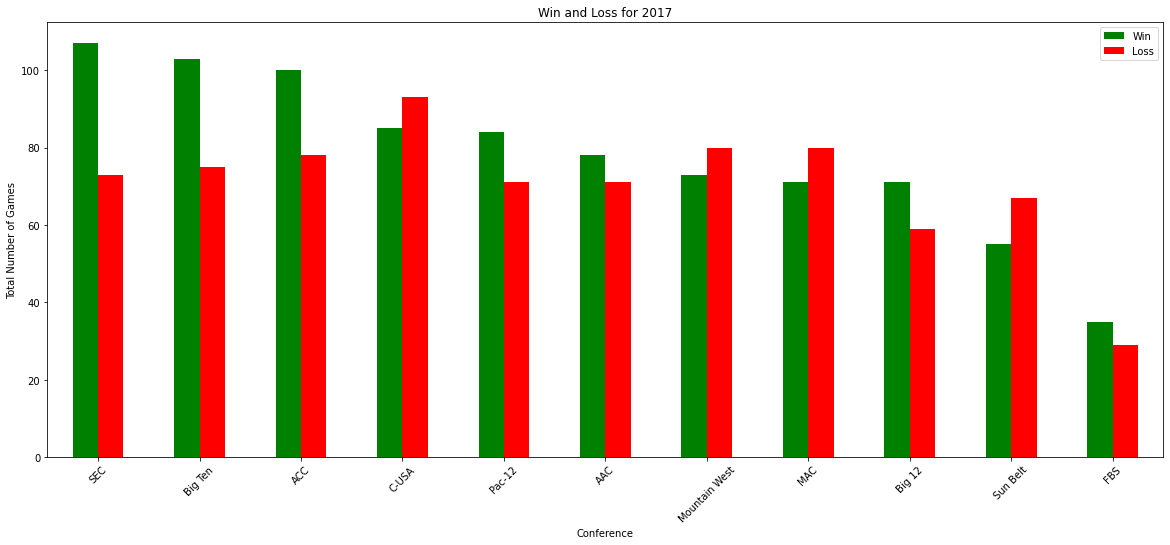

In [11]:
df17 = grouped_17F.sort_values(by=['Win','Loss'], 
                            ascending=False)

plt.rcParams['figure.figsize'] = [20,8]

fig = plt.figure()
chart = df17.plot(kind="bar",y=["Win", "Loss"], color=['Green','Red'])
chart.set_xlabel('Conference')
chart.set_ylabel('Total Number of Games')
chart.set_title("Win and Loss for 2017")
plt.xticks(rotation=45)
plt.show()

<Figure size 1440x576 with 0 Axes>

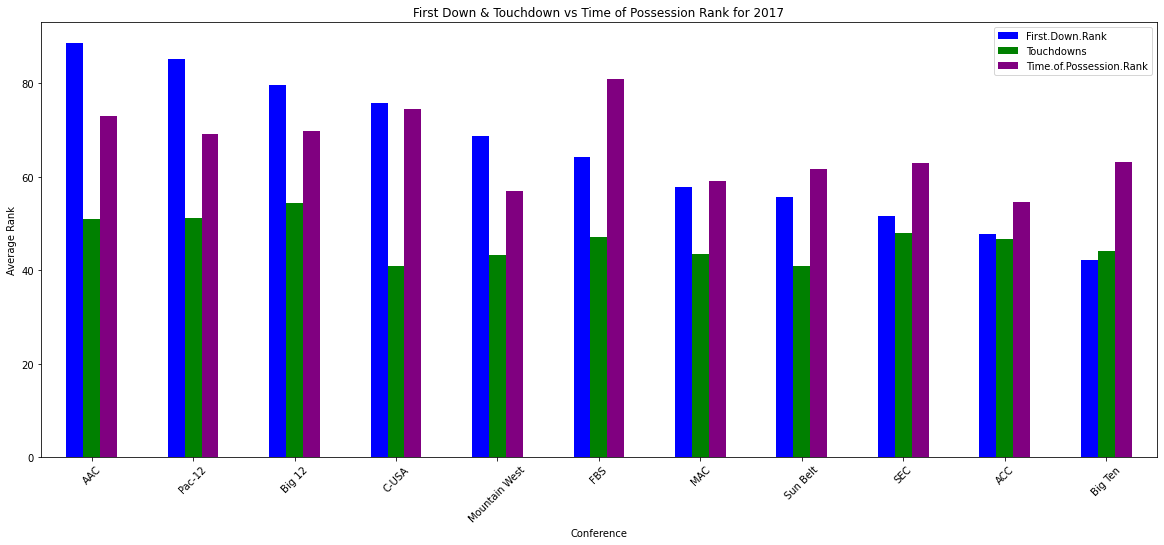

In [12]:
df17 = grouped_17b.sort_values(by=['First.Down.Rank','Touchdowns','Time.of.Possession.Rank'], 
                            ascending=False)

plt.rcParams['figure.figsize'] = [20,8]

fig = plt.figure()
chart = df17.plot(kind="bar",y=["First.Down.Rank", "Touchdowns", "Time.of.Possession.Rank"], color=['Blue','Green', 'Purple'])
chart.set_xlabel('Conference')
chart.set_ylabel('Average Rank')
chart.set_title("First Down & Touchdown vs Time of Possession Rank for 2017")
plt.xticks(rotation=45)
plt.show()

In [13]:
cfb18_data = pd.read_csv(csv_path18, index_col="Year")
cfb18_data.head(20)

,Conference,Team,Games,Win,Loss,Off.Rank,Off.TDs,First.Down.Rank,Redzone.Off.Rank,Touchdowns.Allowed,Touchdowns,Total.Points,Points.Per.Game,Time.of.Possession.Rank,Win.Ratio,Scoring.Ratio
Year,,,,,,,,,,,,,,,,
2018,Mountain West,Air Force (MWC),12,5,7,52,43,8,7,42,47,363,30.3,4,0.417,0.906
2018,MAC,Akron (MAC),12,4,8,126,21,60,2,41,26,227,18.9,104,0.333,0.802
2018,SEC,Alabama (SEC),15,14,1,6,85,53,77,35,92,684,45.6,52,0.933,0.942
2018,Sun Belt,Appalachian St. (Sun Belt),13,11,2,37,58,7,55,21,64,485,37.3,45,0.846,0.924
2018,Pac-12,Arizona (Pac-12),12,5,7,24,43,102,62,52,46,376,31.3,100,0.417,0.856
2018,Pac-12,Arizona St. (Pac-12),13,7,6,50,46,110,34,40,48,389,29.9,75,0.538,0.864
2018,SEC,Arkansas (SEC),12,2,10,117,28,68,68,53,29,260,21.7,67,0.167,0.781
2018,Sun Belt,Arkansas St. (Sun Belt),13,8,5,17,46,21,111,45,50,394,30.3,59,0.615,0.888
2018,FBS,Army West Point (FBS Independent),13,11,2,76,54,4,31,30,57,426,32.8,1,0.846,0.937


In [14]:
cfb18_data = cfb18_data.drop(columns=["Team"])
cfb18_data.head()

,Conference,Games,Win,Loss,Off.Rank,Off.TDs,First.Down.Rank,Redzone.Off.Rank,Touchdowns.Allowed,Touchdowns,Total.Points,Points.Per.Game,Time.of.Possession.Rank,Win.Ratio,Scoring.Ratio
Year,,,,,,,,,,,,,,,
2018,Mountain West,12,5,7,52,43,8,7,42,47,363,30.3,4,0.417,0.906
2018,MAC,12,4,8,126,21,60,2,41,26,227,18.9,104,0.333,0.802
2018,SEC,15,14,1,6,85,53,77,35,92,684,45.6,52,0.933,0.942
2018,Sun Belt,13,11,2,37,58,7,55,21,64,485,37.3,45,0.846,0.924
2018,Pac-12,12,5,7,24,43,102,62,52,46,376,31.3,100,0.417,0.856


In [15]:
grouped_18=pd.pivot_table(cfb18_data, index=['Conference'],values=['Games','Win','Loss','Off.TDs','Touchdowns.Allowed','Touchdowns','Total.Points','Points.Per.Game'],aggfunc=np.sum)

In [16]:
grouped_18.head(11)

,Games,Loss,Off.TDs,Points.Per.Game,Total.Points,Touchdowns,Touchdowns.Allowed,Win
Conference,,,,,,,,
AAC,153,77,607,379.6,4879,639,626,76
ACC,180,80,666,427.9,5549,710,630,100
Big 12,128,56,496,321.6,4136,523,458,72
Big Ten,179,82,606,399.0,5128,641,573,97
C-USA,176,93,534,361.7,4570,568,602,83
FBS,63,26,228,149.5,1885,244,226,37
MAC,152,84,509,328.6,4192,541,575,68
Mountain West,152,74,532,350.5,4470,573,536,78
Pac-12,153,71,518,341.8,4363,551,503,82


In [17]:
grouped_18b=pd.pivot_table(cfb18_data, index=['Conference'],values=['Off.Rank','First.Down.Rank','Redzone.Off.Rank','Time.of.Possession.Rank','Touchdowns', 'Win.Ratio', 'Scoring.Ratio'],aggfunc=np.mean)

In [18]:
grouped_18b.head(11)

,First.Down.Rank,Off.Rank,Redzone.Off.Rank,Scoring.Ratio,Time.of.Possession.Rank,Touchdowns,Win.Ratio
Conference,,,,,,,
AAC,92.166667,52.083333,55.750000,0.909250,73.750000,53.250000,0.489750
ACC,60.500000,59.357143,67.428571,0.893143,67.928571,50.714286,0.544000
Big 12,79.700000,52.500000,71.500000,0.878500,62.600000,52.300000,0.555100
Big Ten,61.214286,65.714286,54.785714,0.867571,60.571429,45.785714,0.532929
C-USA,57.000000,79.000000,79.000000,0.861071,51.000000,40.571429,0.464071
FBS,62.400000,67.600000,59.800000,0.904800,76.200000,48.800000,0.578000
MAC,70.416667,79.000000,68.166667,0.892333,72.000000,45.083333,0.438083
Mountain West,56.750000,68.583333,61.000000,0.890833,65.500000,47.750000,0.502417
Pac-12,67.333333,63.583333,68.750000,0.881167,70.916667,45.916667,0.527583


In [19]:
grouped_18F = pd.concat((grouped_18, grouped_18b), axis=1)
grouped_18F.head(11)

,Games,Loss,Off.TDs,Points.Per.Game,Total.Points,Touchdowns,Touchdowns.Allowed,Win,First.Down.Rank,Off.Rank,Redzone.Off.Rank,Scoring.Ratio,Time.of.Possession.Rank,Touchdowns,Win.Ratio
Conference,,,,,,,,,,,,,,,
AAC,153,77,607,379.6,4879,639,626,76,92.166667,52.083333,55.750000,0.909250,73.750000,53.250000,0.489750
ACC,180,80,666,427.9,5549,710,630,100,60.500000,59.357143,67.428571,0.893143,67.928571,50.714286,0.544000
Big 12,128,56,496,321.6,4136,523,458,72,79.700000,52.500000,71.500000,0.878500,62.600000,52.300000,0.555100
Big Ten,179,82,606,399.0,5128,641,573,97,61.214286,65.714286,54.785714,0.867571,60.571429,45.785714,0.532929
C-USA,176,93,534,361.7,4570,568,602,83,57.000000,79.000000,79.000000,0.861071,51.000000,40.571429,0.464071
FBS,63,26,228,149.5,1885,244,226,37,62.400000,67.600000,59.800000,0.904800,76.200000,48.800000,0.578000
MAC,152,84,509,328.6,4192,541,575,68,70.416667,79.000000,68.166667,0.892333,72.000000,45.083333,0.438083
Mountain West,152,74,532,350.5,4470,573,536,78,56.750000,68.583333,61.000000,0.890833,65.500000,47.750000,0.502417
Pac-12,153,71,518,341.8,4363,551,503,82,67.333333,63.583333,68.750000,0.881167,70.916667,45.916667,0.527583


In [20]:
grouped_18F.reset_index()

,Conference,Games,Loss,Off.TDs,Points.Per.Game,Total.Points,Touchdowns,Touchdowns.Allowed,Win,First.Down.Rank,Off.Rank,Redzone.Off.Rank,Scoring.Ratio,Time.of.Possession.Rank,Touchdowns,Win.Ratio
0,AAC,153,77,607,379.6,4879,639,626,76,92.166667,52.083333,55.750000,0.909250,73.750000,53.250000,0.489750
1,ACC,180,80,666,427.9,5549,710,630,100,60.500000,59.357143,67.428571,0.893143,67.928571,50.714286,0.544000
2,Big 12,128,56,496,321.6,4136,523,458,72,79.700000,52.500000,71.500000,0.878500,62.600000,52.300000,0.555100
3,Big Ten,179,82,606,399.0,5128,641,573,97,61.214286,65.714286,54.785714,0.867571,60.571429,45.785714,0.532929
4,C-USA,176,93,534,361.7,4570,568,602,83,57.000000,79.000000,79.000000,0.861071,51.000000,40.571429,0.464071
5,FBS,63,26,228,149.5,1885,244,226,37,62.400000,67.600000,59.800000,0.904800,76.200000,48.800000,0.578000
6,MAC,152,84,509,328.6,4192,541,575,68,70.416667,79.000000,68.166667,0.892333,72.000000,45.083333,0.438083
7,Mountain West,152,74,532,350.5,4470,573,536,78,56.750000,68.583333,61.000000,0.890833,65.500000,47.750000,0.502417
8,Pac-12,153,71,518,341.8,4363,551,503,82,67.333333,63.583333,68.750000,0.881167,70.916667,45.916667,0.527583
9,SEC,182,69,685,446.5,5854,735,514,113,53.285714,54.357143,60.071429,0.875071,60.428571,52.500000,0.611714


<Figure size 1440x576 with 0 Axes>

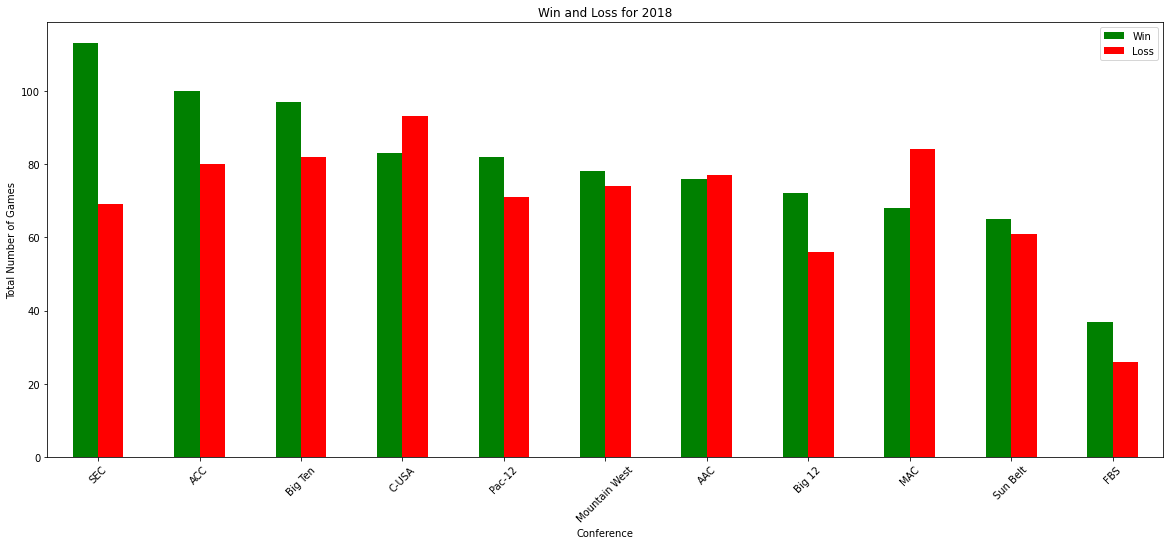

In [21]:
df18 = grouped_18F.sort_values(by=['Win','Loss'], 
                            ascending=False)

plt.rcParams['figure.figsize'] = [20,8]

fig = plt.figure()
chart = df18.plot(kind="bar",y=["Win", "Loss"], color=['Green','Red'])
chart.set_xlabel('Conference')
chart.set_ylabel('Total Number of Games')
chart.set_title("Win and Loss for 2018")
plt.xticks(rotation=45)
plt.show()

<Figure size 1440x576 with 0 Axes>

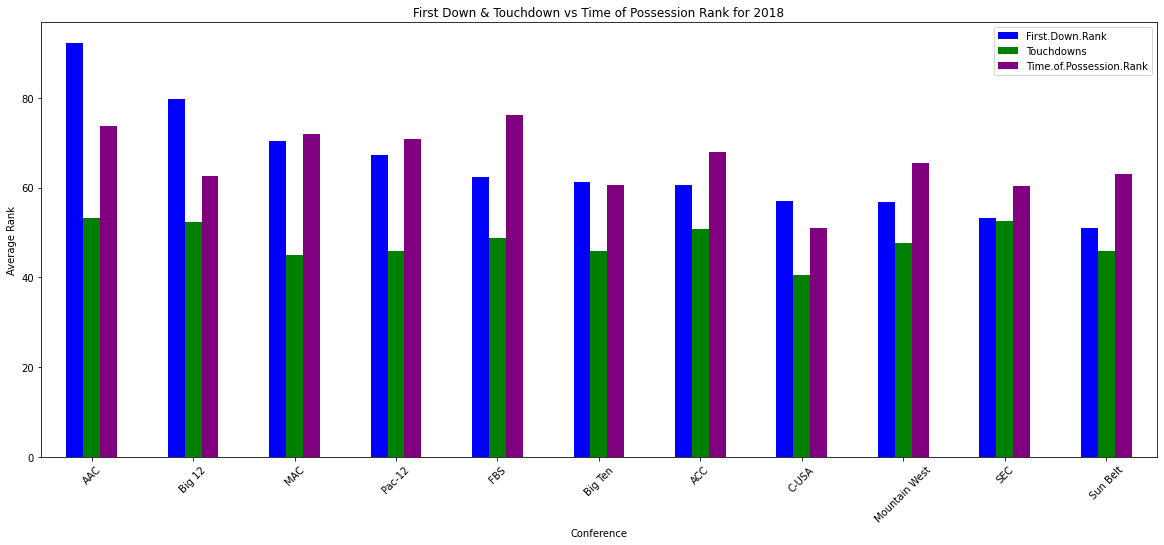

In [22]:
df18 = grouped_18b.sort_values(by=['First.Down.Rank','Touchdowns','Time.of.Possession.Rank'], 
                            ascending=False)

plt.rcParams['figure.figsize'] = [20,8]

fig = plt.figure()
chart = df18.plot(kind="bar",y=["First.Down.Rank", "Touchdowns", "Time.of.Possession.Rank"], color=['Blue','Green', 'Purple'])
chart.set_xlabel('Conference')
chart.set_ylabel('Average Rank')
chart.set_title("First Down & Touchdown vs Time of Possession Rank for 2018")
plt.xticks(rotation=45)
plt.show()

In [23]:
cfb19_data = pd.read_csv(csv_path19, index_col="Year")
cfb19_data.head(20)

,Conference,Team,Games,Win,Loss,Off.Rank,Off.TDs,First.Down.Rank,Redzone.Off.Rank,Touchdowns.Allowed,Touchdowns,Total.Points,Points.Per.Game,Time.of.Possession.Rank,Win.Ratio,Scoring.Ratio
Year,,,,,,,,,,,,,,,,
2019,Mountain West,Air Force (Mountain West),13,11,2,51,55,9,33,34,58,443,34.1,2,0.846,0.916
2019,MAC,Akron (MAC),12,0,12,130,14,58,128,56,15,126,10.5,122,0.000,0.833
2019,SEC,Alabama (SEC),13,11,2,6,76,40,64,26,83,614,47.2,70,0.846,0.946
2019,Sun Belt,Appalachian St. (Sun Belt),14,13,1,39,65,51,14,35,73,543,38.8,36,0.929,0.941
2019,Pac-12,Arizona (Pac-12),12,4,8,30,42,116,53,54,42,323,26.9,115,0.333,0.910
2019,Pac-12,Arizona St. (Pac-12),13,8,5,94,34,87,16,39,36,322,24.8,86,0.615,0.783
2019,SEC,Arkansas (SEC),12,2,10,111,28,80,114,57,31,257,21.4,111,0.167,0.844
2019,Sun Belt,Arkansas St. (Sun Belt),13,8,5,33,50,128,33,56,54,438,33.7,113,0.615,0.863
2019,FBS,Army West Point (FBS Independent),13,5,8,89,51,27,60,38,52,370,28.5,14,0.385,0.984


In [24]:
cfb19_data = cfb19_data.drop(columns=["Team"])
cfb19_data.head()

,Conference,Games,Win,Loss,Off.Rank,Off.TDs,First.Down.Rank,Redzone.Off.Rank,Touchdowns.Allowed,Touchdowns,Total.Points,Points.Per.Game,Time.of.Possession.Rank,Win.Ratio,Scoring.Ratio
Year,,,,,,,,,,,,,,,
2019,Mountain West,13,11,2,51,55,9,33,34,58,443,34.1,2,0.846,0.916
2019,MAC,12,0,12,130,14,58,128,56,15,126,10.5,122,0.000,0.833
2019,SEC,13,11,2,6,76,40,64,26,83,614,47.2,70,0.846,0.946
2019,Sun Belt,14,13,1,39,65,51,14,35,73,543,38.8,36,0.929,0.941
2019,Pac-12,12,4,8,30,42,116,53,54,42,323,26.9,115,0.333,0.910


In [25]:
grouped_19=pd.pivot_table(cfb19_data, index=['Conference'],values=['Games','Win','Loss','Off.TDs','Touchdowns.Allowed','Touchdowns','Total.Points','Points.Per.Game'],aggfunc=np.sum)

In [26]:
grouped_19.head(11)

,Games,Loss,Off.TDs,Points.Per.Game,Total.Points,Touchdowns,Touchdowns.Allowed,Win
Conference,,,,,,,,
AAC,153,66,581,375.4,4827,615,557,87
ACC,181,84,631,401.0,5239,658,593,97
Big 12,128,57,478,310.1,4003,499,419,71
Big Ten,179,77,614,398.0,5143,651,521,102
C-USA,178,94,532,357.1,4571,566,613,84
FBS,76,42,267,168.1,2142,279,297,34
MAC,153,83,500,323.2,4145,520,581,70
Mountain West,154,70,507,334.5,4315,538,533,84
Pac-12,153,70,538,346.0,4433,563,506,83


In [27]:
grouped_19b=pd.pivot_table(cfb19_data, index=['Conference'],values=['Off.Rank','First.Down.Rank','Redzone.Off.Rank','Time.of.Possession.Rank','Touchdowns', 'Win.Ratio', 'Scoring.Ratio'],aggfunc=np.mean)

In [28]:
grouped_19b.head(11)

,First.Down.Rank,Off.Rank,Redzone.Off.Rank,Scoring.Ratio,Time.of.Possession.Rank,Touchdowns,Win.Ratio
Conference,,,,,,,
AAC,76.583333,51.333333,72.250000,0.886917,59.833333,51.250000,0.556583
ACC,64.571429,65.357143,67.357143,0.873714,69.857143,47.000000,0.526929
Big 12,72.400000,50.200000,27.400000,0.869100,67.900000,49.900000,0.544300
Big Ten,39.928571,75.071429,64.571429,0.875143,62.428571,46.500000,0.559143
C-USA,55.071429,79.928571,70.785714,0.861857,55.357143,40.428571,0.461286
FBS,74.666667,70.000000,80.500000,0.911500,86.000000,46.500000,0.439000
MAC,78.583333,69.500000,69.166667,0.873833,68.583333,43.333333,0.451417
Mountain West,64.083333,66.916667,79.500000,0.865583,58.333333,44.833333,0.534417
Pac-12,82.500000,61.500000,54.000000,0.882250,70.333333,46.916667,0.533167


In [29]:
grouped_19F = pd.concat((grouped_19, grouped_19b), axis=1)
grouped_19F.head(11)

,Games,Loss,Off.TDs,Points.Per.Game,Total.Points,Touchdowns,Touchdowns.Allowed,Win,First.Down.Rank,Off.Rank,Redzone.Off.Rank,Scoring.Ratio,Time.of.Possession.Rank,Touchdowns,Win.Ratio
Conference,,,,,,,,,,,,,,,
AAC,153,66,581,375.4,4827,615,557,87,76.583333,51.333333,72.250000,0.886917,59.833333,51.250000,0.556583
ACC,181,84,631,401.0,5239,658,593,97,64.571429,65.357143,67.357143,0.873714,69.857143,47.000000,0.526929
Big 12,128,57,478,310.1,4003,499,419,71,72.400000,50.200000,27.400000,0.869100,67.900000,49.900000,0.544300
Big Ten,179,77,614,398.0,5143,651,521,102,39.928571,75.071429,64.571429,0.875143,62.428571,46.500000,0.559143
C-USA,178,94,532,357.1,4571,566,613,84,55.071429,79.928571,70.785714,0.861857,55.357143,40.428571,0.461286
FBS,76,42,267,168.1,2142,279,297,34,74.666667,70.000000,80.500000,0.911500,86.000000,46.500000,0.439000
MAC,153,83,500,323.2,4145,520,581,70,78.583333,69.500000,69.166667,0.873833,68.583333,43.333333,0.451417
Mountain West,154,70,507,334.5,4315,538,533,84,64.083333,66.916667,79.500000,0.865583,58.333333,44.833333,0.534417
Pac-12,153,70,538,346.0,4433,563,506,83,82.500000,61.500000,54.000000,0.882250,70.333333,46.916667,0.533167


In [30]:
grouped_19F.reset_index()

,Conference,Games,Loss,Off.TDs,Points.Per.Game,Total.Points,Touchdowns,Touchdowns.Allowed,Win,First.Down.Rank,Off.Rank,Redzone.Off.Rank,Scoring.Ratio,Time.of.Possession.Rank,Touchdowns,Win.Ratio
0,AAC,153,66,581,375.4,4827,615,557,87,76.583333,51.333333,72.250000,0.886917,59.833333,51.250000,0.556583
1,ACC,181,84,631,401.0,5239,658,593,97,64.571429,65.357143,67.357143,0.873714,69.857143,47.000000,0.526929
2,Big 12,128,57,478,310.1,4003,499,419,71,72.400000,50.200000,27.400000,0.869100,67.900000,49.900000,0.544300
3,Big Ten,179,77,614,398.0,5143,651,521,102,39.928571,75.071429,64.571429,0.875143,62.428571,46.500000,0.559143
4,C-USA,178,94,532,357.1,4571,566,613,84,55.071429,79.928571,70.785714,0.861857,55.357143,40.428571,0.461286
5,FBS,76,42,267,168.1,2142,279,297,34,74.666667,70.000000,80.500000,0.911500,86.000000,46.500000,0.439000
6,MAC,153,83,500,323.2,4145,520,581,70,78.583333,69.500000,69.166667,0.873833,68.583333,43.333333,0.451417
7,Mountain West,154,70,507,334.5,4315,538,533,84,64.083333,66.916667,79.500000,0.865583,58.333333,44.833333,0.534417
8,Pac-12,153,70,538,346.0,4433,563,506,83,82.500000,61.500000,54.000000,0.882250,70.333333,46.916667,0.533167
9,SEC,180,73,640,413.5,5392,678,504,107,45.928571,67.428571,66.500000,0.871143,64.500000,48.428571,0.580786


<Figure size 1440x576 with 0 Axes>

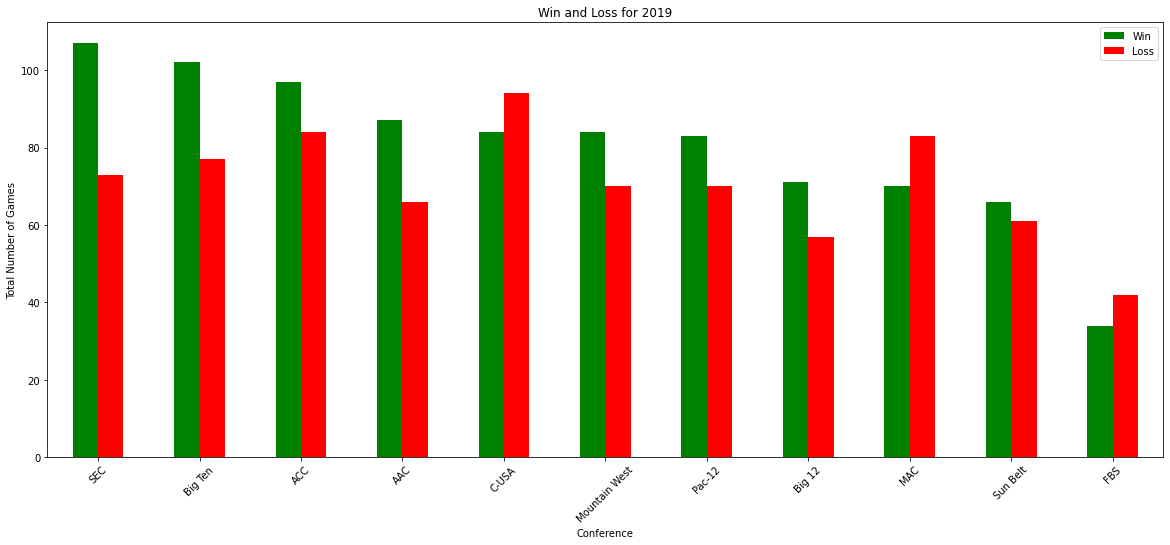

In [31]:
df19 = grouped_19F.sort_values(by=['Win','Loss'], 
                            ascending=False)

plt.rcParams['figure.figsize'] = [20,8]

fig = plt.figure()
chart = df19.plot(kind="bar",y=["Win", "Loss"], color=['Green','Red'])
chart.set_xlabel('Conference')
chart.set_ylabel('Total Number of Games')
chart.set_title("Win and Loss for 2019")
plt.xticks(rotation=45)
plt.show()

<Figure size 1440x576 with 0 Axes>

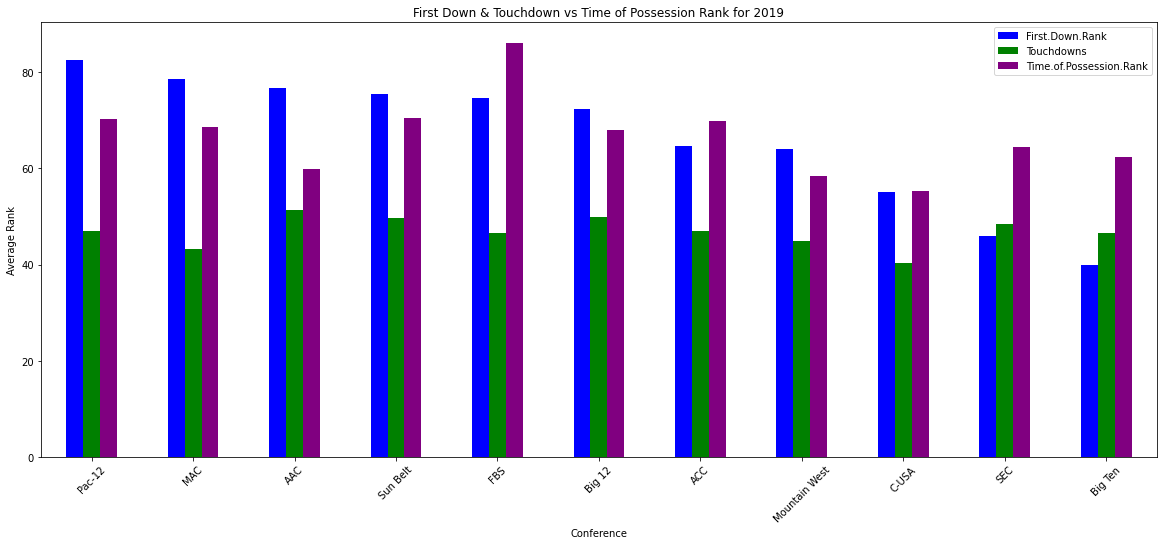

In [32]:
df19 = grouped_19b.sort_values(by=['First.Down.Rank','Touchdowns','Time.of.Possession.Rank'], 
                            ascending=False)

plt.rcParams['figure.figsize'] = [20,8]

fig = plt.figure()
chart = df19.plot(kind="bar",y=["First.Down.Rank", "Touchdowns", "Time.of.Possession.Rank"], color=['Blue','Green', 'Purple'])
chart.set_xlabel('Conference')
chart.set_ylabel('Average Rank')
chart.set_title("First Down & Touchdown vs Time of Possession Rank for 2019")
plt.xticks(rotation=45)
plt.show()

In [33]:
cfb20_data = pd.read_csv(csv_path20, index_col="Year")
cfb20_data.head(20)

,Conference,Team,Games,Win,Loss,Off.Rank,Off.TDs,First.Down.Rank,Redzone.Off.Rank,Touchdowns.Allowed,Touchdowns,Total.Points,Points.Per.Game,Time.of.Possession.Rank,Win.Ratio,Scoring.Ratio
Year,,,,,,,,,,,,,,,,
2020,Mountain West,Air Force (Mountain West),6,3,3,73,19,14,117,12,19,146,24.3,19,0.500,0.911
2020,MAC,Akron (MAC),6,1,5,121,12,24,41,34,13,103,17.2,52,0.167,0.883
2020,SEC,Alabama (SEC),11,11,0,5,68,92,11,25,73,547,49.7,48,1.000,0.934
2020,Sun Belt,App State (Sun Belt),12,9,3,26,49,101,106,30,52,406,33.8,21,0.750,0.897
2020,Pac-12,Arizona (Pac-12),5,0,5,86,10,16,119,26,10,87,17.4,103,0.000,0.805
2020,Pac-12,Arizona St. (Pac-12),4,2,2,20,21,10,37,13,22,161,40.2,83,0.500,0.957
2020,SEC,Arkansas (SEC),10,3,7,67,31,120,15,43,34,257,25.7,125,0.300,0.926
2020,Sun Belt,Arkansas St. (Sun Belt),11,4,7,13,46,123,98,53,47,362,32.9,92,0.364,0.909
2020,FBS,Army West Point (FBS Independent),11,9,2,112,37,43,23,20,40,300,27.3,7,0.818,0.933


In [34]:
cfb20_data = cfb20_data.drop(columns=["Team"])
cfb20_data.head()

,Conference,Games,Win,Loss,Off.Rank,Off.TDs,First.Down.Rank,Redzone.Off.Rank,Touchdowns.Allowed,Touchdowns,Total.Points,Points.Per.Game,Time.of.Possession.Rank,Win.Ratio,Scoring.Ratio
Year,,,,,,,,,,,,,,,
2020,Mountain West,6,3,3,73,19,14,117,12,19,146,24.3,19,0.500,0.911
2020,MAC,6,1,5,121,12,24,41,34,13,103,17.2,52,0.167,0.883
2020,SEC,11,11,0,5,68,92,11,25,73,547,49.7,48,1.000,0.934
2020,Sun Belt,12,9,3,26,49,101,106,30,52,406,33.8,21,0.750,0.897
2020,Pac-12,5,0,5,86,10,16,119,26,10,87,17.4,103,0.000,0.805


In [35]:
grouped_20=pd.pivot_table(cfb20_data, index=['Conference'],values=['Games','Win','Loss','Off.TDs','Touchdowns.Allowed','Touchdowns','Total.Points','Points.Per.Game'],aggfunc=np.sum)

In [36]:
grouped_20.head(11)

,Games,Loss,Off.TDs,Points.Per.Game,Total.Points,Touchdowns,Touchdowns.Allowed,Win
Conference,,,,,,,,
AAC,103,50,383,332.8,3162,404,392,53
ACC,157,74,580,465.6,4871,610,565,83
Big 12,97,47,337,297.8,2904,363,340,50
Big Ten,100,50,315,374.2,2663,333,333,50
C-USA,113,61,347,328.3,2878,364,400,52
FBS,37,8,154,112.1,1217,161,90,29
MAC,65,32,256,385.1,2088,270,269,33
Mountain West,81,41,249,308.9,2118,264,264,40
Pac-12,63,31,233,355.4,1885,242,241,32


In [37]:
grouped_20b=pd.pivot_table(cfb20_data, index=['Conference'],values=['Off.Rank','First.Down.Rank','Redzone.Off.Rank','Time.of.Possession.Rank','Touchdowns', 'Win.Ratio', 'Scoring.Ratio'],aggfunc=np.mean)

In [38]:
grouped_20b.head(11)

,First.Down.Rank,Off.Rank,Redzone.Off.Rank,Scoring.Ratio,Time.of.Possession.Rank,Touchdowns,Win.Ratio
Conference,,,,,,,
AAC,84.545455,54.818182,59.545455,0.888364,66.272727,36.727273,0.503545
ACC,97.133333,51.200000,60.000000,0.875933,65.200000,40.666667,0.525800
Big 12,77.000000,59.200000,53.300000,0.874400,58.700000,36.300000,0.507200
Big Ten,41.857143,76.000000,70.571429,0.873357,69.142857,23.785714,0.502857
C-USA,63.384615,86.230769,73.384615,0.883462,60.000000,28.000000,0.435000
FBS,52.250000,65.000000,67.250000,0.843250,53.000000,40.250000,0.658750
MAC,25.000000,56.500000,57.666667,0.889917,66.833333,22.500000,0.511000
Mountain West,34.250000,75.916667,75.750000,0.871417,62.666667,22.000000,0.465333
Pac-12,21.083333,55.250000,44.083333,0.890583,58.666667,20.166667,0.502667


In [39]:
grouped_20F = pd.concat((grouped_20, grouped_20b), axis=1)
grouped_20F.head(11)

,Games,Loss,Off.TDs,Points.Per.Game,Total.Points,Touchdowns,Touchdowns.Allowed,Win,First.Down.Rank,Off.Rank,Redzone.Off.Rank,Scoring.Ratio,Time.of.Possession.Rank,Touchdowns,Win.Ratio
Conference,,,,,,,,,,,,,,,
AAC,103,50,383,332.8,3162,404,392,53,84.545455,54.818182,59.545455,0.888364,66.272727,36.727273,0.503545
ACC,157,74,580,465.6,4871,610,565,83,97.133333,51.200000,60.000000,0.875933,65.200000,40.666667,0.525800
Big 12,97,47,337,297.8,2904,363,340,50,77.000000,59.200000,53.300000,0.874400,58.700000,36.300000,0.507200
Big Ten,100,50,315,374.2,2663,333,333,50,41.857143,76.000000,70.571429,0.873357,69.142857,23.785714,0.502857
C-USA,113,61,347,328.3,2878,364,400,52,63.384615,86.230769,73.384615,0.883462,60.000000,28.000000,0.435000
FBS,37,8,154,112.1,1217,161,90,29,52.250000,65.000000,67.250000,0.843250,53.000000,40.250000,0.658750
MAC,65,32,256,385.1,2088,270,269,33,25.000000,56.500000,57.666667,0.889917,66.833333,22.500000,0.511000
Mountain West,81,41,249,308.9,2118,264,264,40,34.250000,75.916667,75.750000,0.871417,62.666667,22.000000,0.465333
Pac-12,63,31,233,355.4,1885,242,241,32,21.083333,55.250000,44.083333,0.890583,58.666667,20.166667,0.502667


In [40]:
grouped_20F.reset_index()

,Conference,Games,Loss,Off.TDs,Points.Per.Game,Total.Points,Touchdowns,Touchdowns.Allowed,Win,First.Down.Rank,Off.Rank,Redzone.Off.Rank,Scoring.Ratio,Time.of.Possession.Rank,Touchdowns,Win.Ratio
0,AAC,103,50,383,332.8,3162,404,392,53,84.545455,54.818182,59.545455,0.888364,66.272727,36.727273,0.503545
1,ACC,157,74,580,465.6,4871,610,565,83,97.133333,51.200000,60.000000,0.875933,65.200000,40.666667,0.525800
2,Big 12,97,47,337,297.8,2904,363,340,50,77.000000,59.200000,53.300000,0.874400,58.700000,36.300000,0.507200
3,Big Ten,100,50,315,374.2,2663,333,333,50,41.857143,76.000000,70.571429,0.873357,69.142857,23.785714,0.502857
4,C-USA,113,61,347,328.3,2878,364,400,52,63.384615,86.230769,73.384615,0.883462,60.000000,28.000000,0.435000
5,FBS,37,8,154,112.1,1217,161,90,29,52.250000,65.000000,67.250000,0.843250,53.000000,40.250000,0.658750
6,MAC,65,32,256,385.1,2088,270,269,33,25.000000,56.500000,57.666667,0.889917,66.833333,22.500000,0.511000
7,Mountain West,81,41,249,308.9,2118,264,264,40,34.250000,75.916667,75.750000,0.871417,62.666667,22.000000,0.465333
8,Pac-12,63,31,233,355.4,1885,242,241,32,21.083333,55.250000,44.083333,0.890583,58.666667,20.166667,0.502667
9,SEC,138,69,483,409.2,4063,516,516,69,96.000000,61.428571,62.000000,0.883786,62.714286,36.857143,0.495571


<Figure size 1440x576 with 0 Axes>

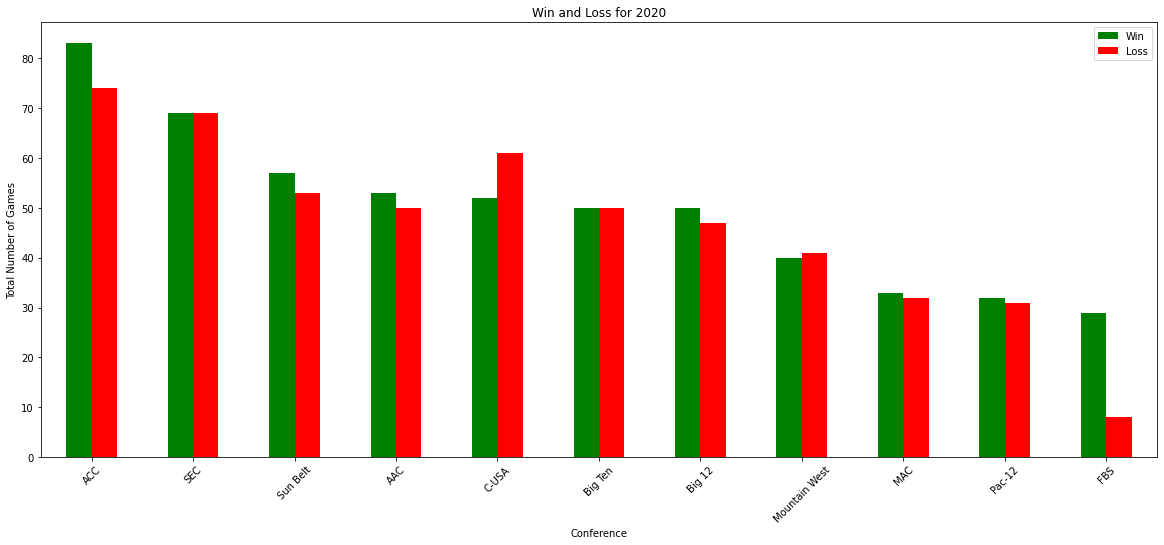

In [41]:
df20 = grouped_20F.sort_values(by=['Win','Loss'], 
                            ascending=False)

plt.rcParams['figure.figsize'] = [20,8]

fig = plt.figure()
chart = df20.plot(kind="bar",y=["Win", "Loss"], color=['Green','Red'])
chart.set_xlabel('Conference')
chart.set_ylabel('Total Number of Games')
chart.set_title("Win and Loss for 2020")
plt.xticks(rotation=45)
plt.show()

<Figure size 1440x576 with 0 Axes>

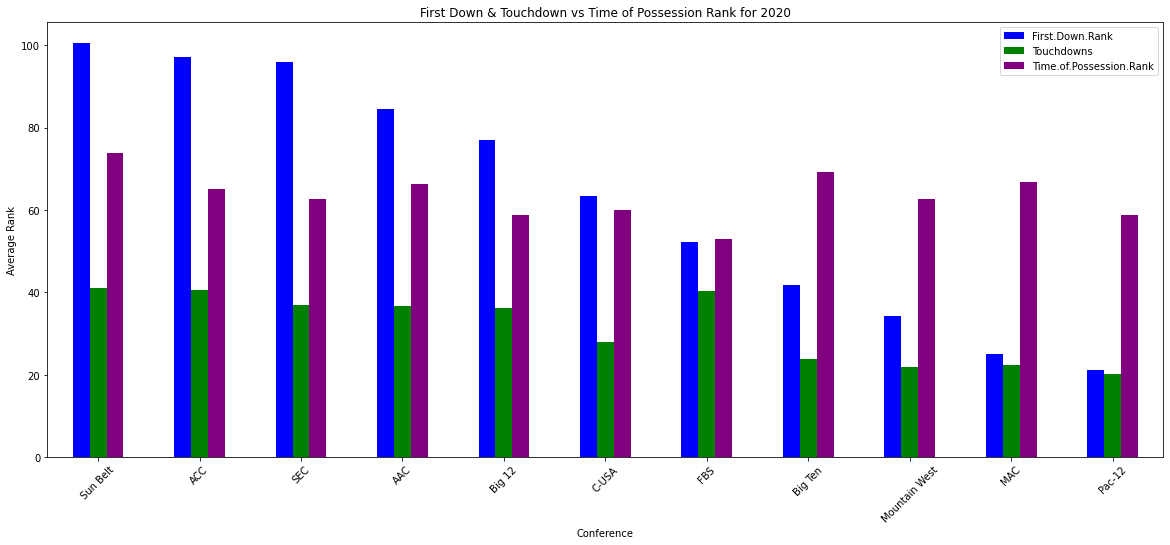

In [42]:
df20 = grouped_20b.sort_values(by=['First.Down.Rank','Touchdowns','Time.of.Possession.Rank'], 
                            ascending=False)

plt.rcParams['figure.figsize'] = [20,8]

fig = plt.figure()
chart = df20.plot(kind="bar",y=["First.Down.Rank", "Touchdowns", "Time.of.Possession.Rank"], color=['Blue','Green', 'Purple'])
chart.set_xlabel('Conference')
chart.set_ylabel('Average Rank')
chart.set_title("First Down & Touchdown vs Time of Possession Rank for 2020")
plt.xticks(rotation=45)
plt.show()

In [43]:
cfb4YRb_data = pd.read_csv(csv_path4YRSb, index_col="Number")
cfb4YRb_data.head()

,Games,Win,Loss,Off.Rank,Off.TDs,First.Down.Rank,Redzone.Off.Rank,Touchdowns.Allowed,Touchdowns,Total.Points,Points.Per.Game,Time.of.Possession.Rank,Win.Ratio,Scoring.Ratio
Number,,,,,,,,,,,,,,
1,12,5,7,49,48,14,38,49,50,377,31.4,7,0.417,0.928
2,14,7,7,121,38,129,121,49,42,310,22.1,89,0.500,0.948
3,14,13,1,29,64,17,57,18,66,519,37.1,70,0.929,0.890
4,13,9,4,31,55,20,67,30,55,435,33.5,32,0.692,0.885
5,13,7,6,12,67,128,34,59,71,537,41.3,92,0.538,0.926


In [44]:
grouped_4YRb=pd.pivot_table(cfb4YRb_data, index=['Number'],values=['Win.Ratio', 'Scoring.Ratio'],aggfunc=np.mean)

In [45]:
grouped_4YRb.head()

,Scoring.Ratio,Win.Ratio
Number,,
1,0.928,0.417
2,0.948,0.500
3,0.890,0.929
4,0.885,0.692
5,0.926,0.538


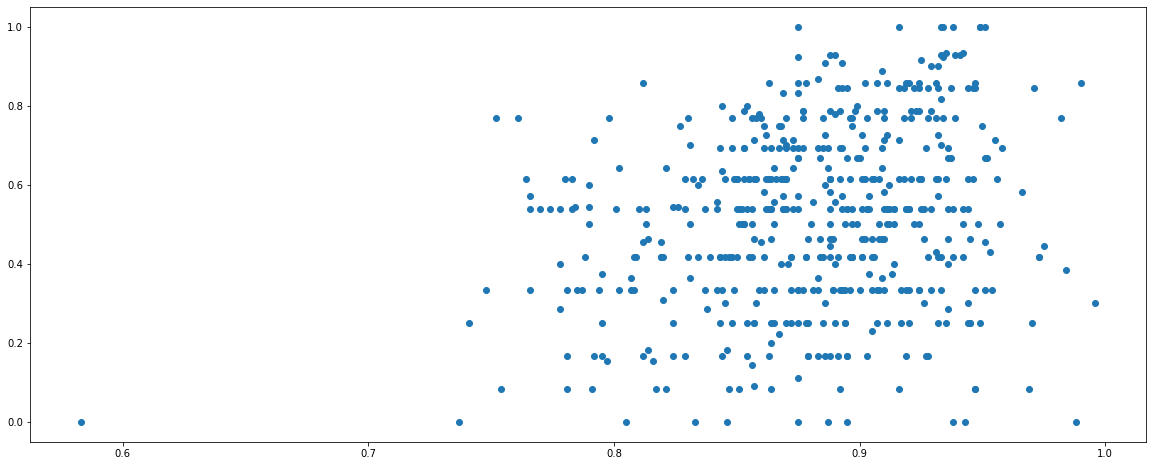

In [46]:
plt.scatter(grouped_4YRb["Scoring.Ratio"], grouped_4YRb["Win.Ratio"])

In [47]:
# Create a Linear Regression Model using sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [48]:
# Separate the data into the X and y components
# In this case, y will be the `Price` and X will be the remainign columns
X = grouped_4YRb["Scoring.Ratio"].values.reshape(-1,1)
y = grouped_4YRb["Win.Ratio"]

In [49]:
# Fit the model to the data
model.fit(X, y)

LinearRegression()

In [50]:
# Make predictions using the X data
predicted_y_values = model.predict(X)
predicted_y_values

array([0.56563626, 0.58713279, 0.52479285, 0.51941872, 0.56348661,
       0.49469771, 0.5710104 , 0.54628938, 0.6236769 , 0.48932357,
       0.51296976, 0.41838502, 0.51082011, 0.53661594, 0.45922843,
       0.51404459, 0.44955499, 0.44955499, 0.58498314, 0.58605797,
       0.5269425 , 0.56886074, 0.46997669, 0.5387656 , 0.48394944,
       0.474276  , 0.50544597, 0.49469771, 0.56133696, 0.43558224,
       0.48287461, 0.41945984, 0.44095638, 0.51726906, 0.49362288,
       0.59035727, 0.58820762, 0.5226432 , 0.49792219, 0.42268432,
       0.47965013, 0.55273834, 0.49899701, 0.40763675, 0.48179979,
       0.4538543 , 0.42913328, 0.56671109, 0.56993557, 0.4420312 ,
       0.54091525, 0.50329632, 0.54413973, 0.55703765, 0.53124181,
       0.57208522, 0.50329632, 0.51834389, 0.46245291, 0.48824875,
       0.49684736, 0.47642565, 0.5269425 , 0.53984042, 0.55596282,
       0.57423488, 0.51726906, 0.56993557, 0.50867045, 0.55596282,
       0.55703765, 0.52156837, 0.56886074, 0.5387656 , 0.53231

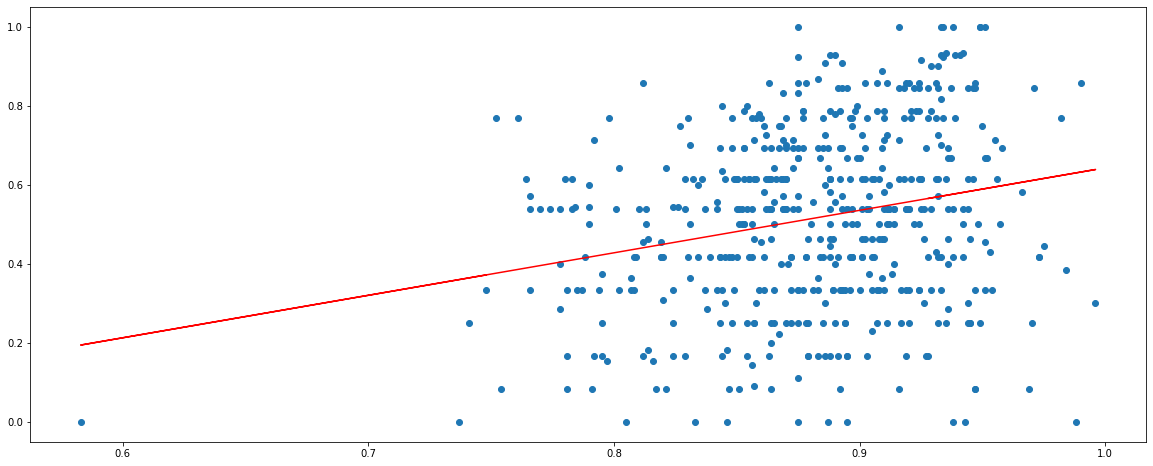

In [51]:
# Plot X and y as a scatter plot
# Plot X and the predictions as a red line plot
plt.scatter(X, y)
plt.plot(X, predicted_y_values, color='red')

In [52]:
model.coef_

array([1.07482661])

In [53]:
model.intercept_

-0.4318028282351002

In [54]:
# R2 value
model.score(X, y, sample_weight=None)

0.054451522527270035